# This is a  document summarizing the architecure and specifications of the generic RTL-SDR.

RTL-SDR refers to Realtek Software Defined Radio. It is basically a USB dongle, originally produced for DVB-T(Digial Video Broadcasting - Terestrial) reception.
A few intersted enterprising and knowledgebale individuals realized that this demodulator can be placed in a 'test mode'. The DVB device acts as IF digital radios and domplex digitized data can be obtained. This realization revolutionized the world for radio hobbyists in a sense that with an USB dongle connected to a PC, any signal from 25 MHz to 1.7GHz and later demodulated.
The generic RTL-SDR contains basically two chips.
file:///home/pratush/Pictures/rtl-sdr_highlevelblockdiagram.png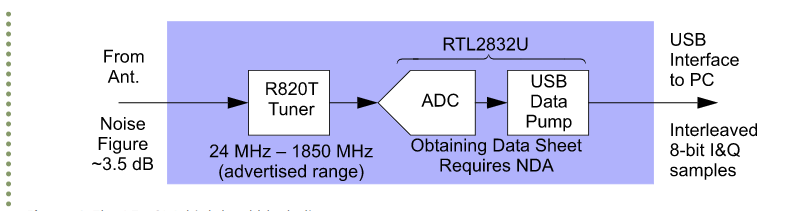




### Rafael Micro R820T/2 Silicon tuner :
It is a tuner chip which selects a portion of RF spectra (roughly 6 MHz wide)and downconverts to an IF frequency of 3.75MHz. It has an LNA, BPF, PLL, a multiplier.


### RTL2832U Digital IF to Baseband Receiver functionality:
It a demodulator chip which takes the IF signal from the Rafael Micro R820T/2 and disitalize it and uses Digital Downconversion to convert the signal from Intermediate frequency to baseband, it also reduces the sampling rate of the digitized baseband signal.


file:///home/pratush/Pictures/internalarchofRTL-SDR.png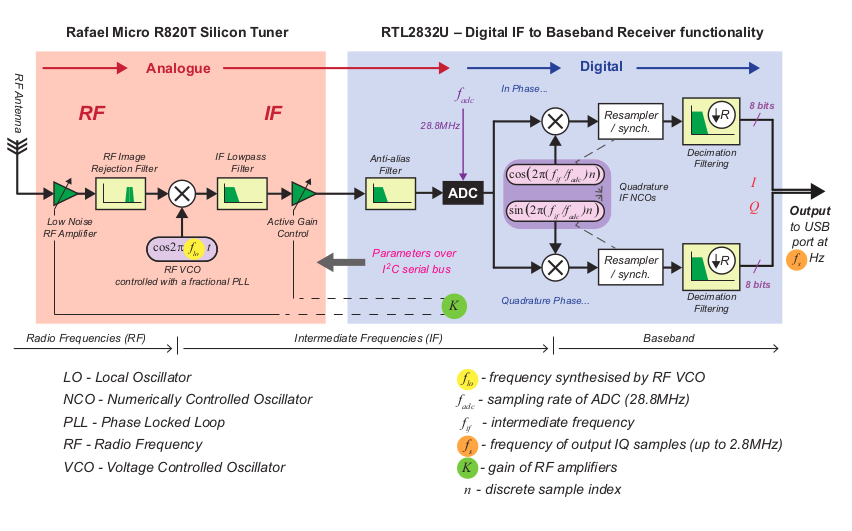

The RTL2832U has an ADC which has the sampling rate of 28.8 MHz. After this the data is decimated depending upon the value set by the program interacting with the RTL-SDR to take the data via USB2.0.
Let's take an example of the RTL-SDR in action, lets's assume that we wanted it to receive a standard FM radio station centred at 102.5MHz. To do this, we would set the center frequency of the RTL-SDR, fc, to 102.5MHz, and apply an appropriate tuner gain.The signal would be downconverted by the tuner from RF to an IF (or zero-IF) using either the R820T or the E4000, sampled at 28.8MHz by the RTL2832U, and then output as a baseband IQ signal to your computer. At this point, the signal would still be FM modulated (as baseband), and would need to be demodulated in order to  recover the audio signal.

The rate at which samples are output by the RTL-SDR can also be configured, and reducing the rate often improves the performance of the baseband processing on less powerful computers. Setting the 'fs' value to 2.4MHz, for instance, will configure the RTL2832U to decimate by a factor of 12(noting the ADC samples at 28.8MHz), meaning only one in every 12 IQ samples is output to the computer. With this reduced sampling rate, the signal the computer receives has a bandwidth of fs, i.e 2.4MHz (noting that it is a complex signal), and spans from  (-fs/2 to fs/2) Hz.


An important point to note here is that although we have the flexibility to choose the sampling rate at which we want the input data from the RTL-SDR. It has been observed that if fs was put to 2.8MHz the spectrum of the received data contained additional peaks.
The reason for these unwanted additional peaks are still no clear.

file:///home/pratush/Pictures/timedomainplot.png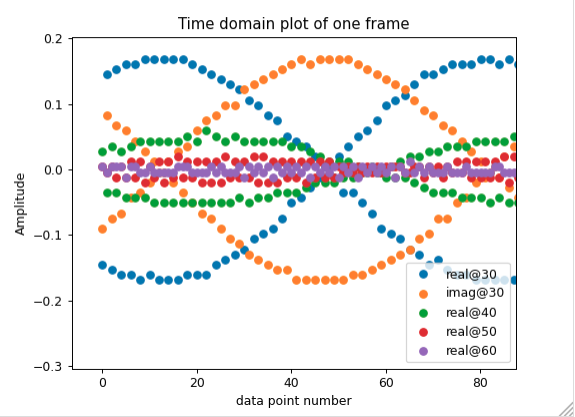


Thd figure above represents enlarged view of the time domain plot of one frame of data. The input given to RTL-SDR is a continuous signal of a specific frequency (here it is 150MHz) from the signal generator.There are a few imporant points to notice here. One thing is quite clear that at -40dBm the effect of saturation of ADC is dominating as the changes in points is lesser than the resolution of the ADC. The effect of saturation is in a sense the limiting factor for the precise measurements and one of the most important drawbacks of the RTL-SDR.

Date 19-11-2020
If the zoomed time-domain plot is looked closely, we will find out that the real and complex part of the signal plotted samples are at present at all instants of sampling. What we can infer from this is that either a signal is sampled then digital down-conversion converted by multiplying sine and cosines with the same copy of signal.
But what is the need for such down-coversion?? I do not get the point here.
The more surprising observation is that there are actually two  real signals and two complex signals and their samples occur in time interleaved manner, meaning that one sample correspond to the actual real signal and the next time sample corresponds to 180 degree shifted signal of the same signal.
I am not able to figure out why actually the RTL-SDR gives the output the way it is giving.
It is well known that the RTL-SDR has originally been designed for the DVB-T transmission.

In [2]:
!pip install IPython

In [3]:
from IPython.display import Image

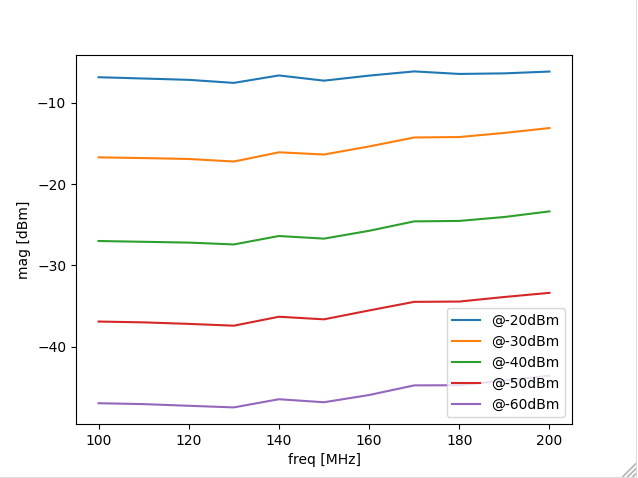

In [4]:
Image(filename = '/home/pratush/Pictures/freqVspower.png', width = 800, height = 800)

The figure above shows the complete 100MHz to 200MHz. Although only 11 points starting from 100MHz with a gap of 10MHz has been shown in the figure above. As the above figure has been plotted in dB scale, the linear scale plotting may give more insight into the plot of power variation Vs frequency.
Below is the linear plot of power variation Vs frequency.

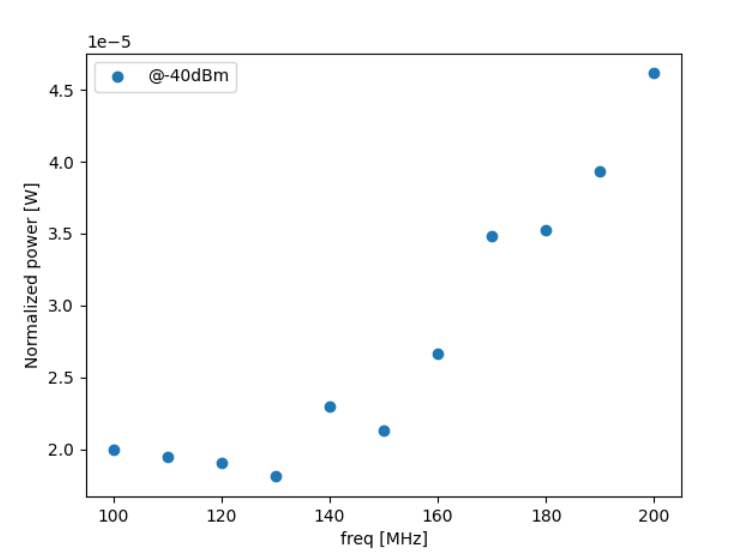

In [5]:
Image(filename = '/home/pratush/Pictures/linear_scatterplot.png', width = 800, height = 800)

It is evident from the above figure that there is some kind of error that is occuring at microscale. But it can be modeled or removed by fitting a straight line from 130MHz to 200MHz, if the power corresponding to 140MHz and 170MHz can be somehow hid.
But all the above modifications are based on the assumption that the RTL-SDR behaves linearly with power.

## Block diagram for S11 measurement

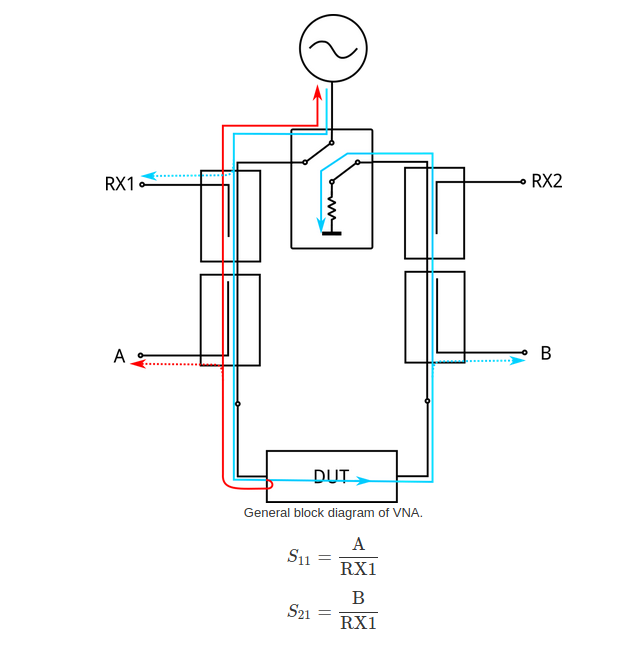

In [6]:
Image(filename='/home/pratush/Pictures/blockdiagram_S11measurement.png', width = 800, height=800)

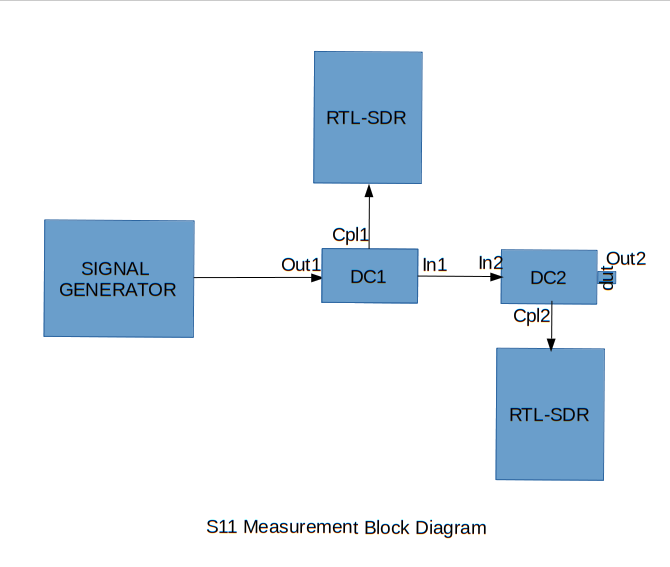

In [7]:
Image(filename = '/home/pratush/Pictures/vnartlsdrblock.png', width = 800, height = 800)

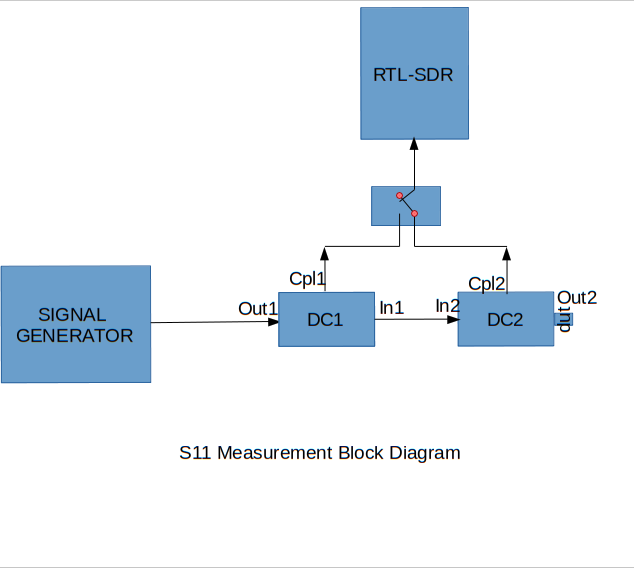

In [8]:
Image(filename = '/home/pratush/Pictures/Blockvnaswitch.png',width = 800, height = 800)

The block diagrams shown above with RTL-SDR has one important assumption. Without the synchronization of the signal generator and the digital receiver part, precise measurement of reflection coefficient would be very difficult.
Although we are assuming that the RTL-SDR can act as a well-behaved receiver, there is two level of downconversion happening in RTL-SDR itself which needs to have good synchronization above all. The synchronization for the second block diagram becomes a necessity as we are having one receiver that is measuring both the input power and output power using a switch.

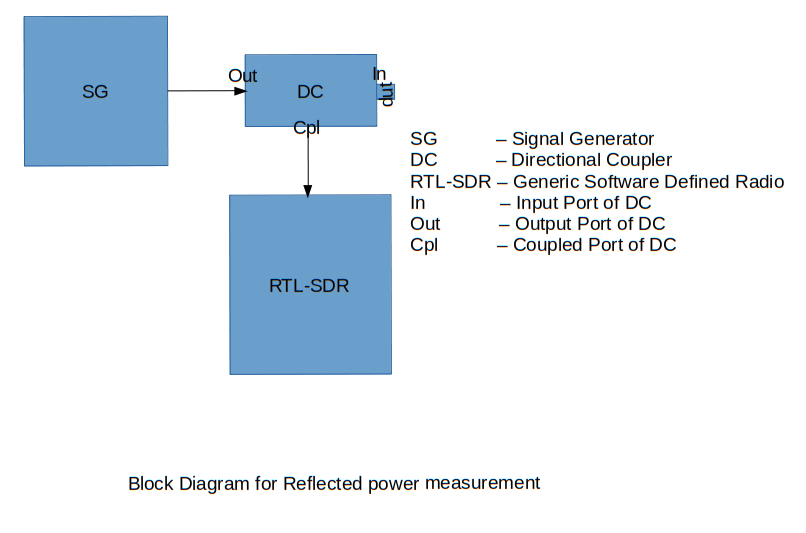

In [10]:
Image(filename = '/home/pratush/Pictures/reflectedpowermeas.png', width = 800, height = 200)